### Anthony Rodrigues
#### RollNo. 58
#### SE-AIML
#### Date: 9/02/2026

# Experiment 4: Classification Using Logistic Regression, Decision Tree, and k-Nearest Neighbors

In [120]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix

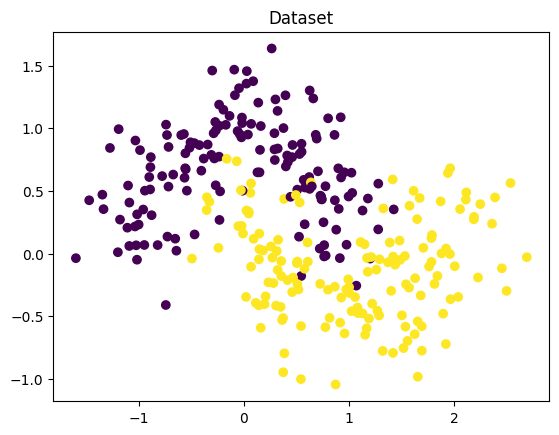

In [121]:
X,y = make_moons(n_samples=300, noise=0.25, random_state=42)
plt.scatter(X[:,0],X[:,1], c=y)
plt.title("Dataset")
plt.show()

In [122]:
X_train, X_test, y_train, y_test = train_test_split(
    X,y,test_size=0.3,random_state=0
)

### Scaling the dataset

In [123]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

### Logistic Regression

In [124]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train_scaled,y_train)
y_pred_lr = lr.predict(X_test_scaled)

print("Logistic Regression")
print("Accuracy:", accuracy_score(y_test,y_pred_lr))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred_lr))


Logistic Regression
Accuracy: 0.8777777777777778
Confusion Matrix:
 [[34  5]
 [ 6 45]]


### Decision Tree

In [125]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth=4)
dt.fit(X_train,y_train)
y_pred_dt = dt.predict(X_test)

print("Decision Tree")
print("Accuracy:", accuracy_score(y_test,y_pred_dt))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred_dt))

Decision Tree
Accuracy: 0.8555555555555555
Confusion Matrix:
 [[30  9]
 [ 4 47]]


In [126]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled,y_train)

y_pred_knn = knn.predict(X_test_scaled)
print("KNN")
print("Accuracy:", accuracy_score(y_test,y_pred_knn))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred_knn))


KNN
Accuracy: 0.9111111111111111
Confusion Matrix:
 [[38  1]
 [ 7 44]]


### Visualization

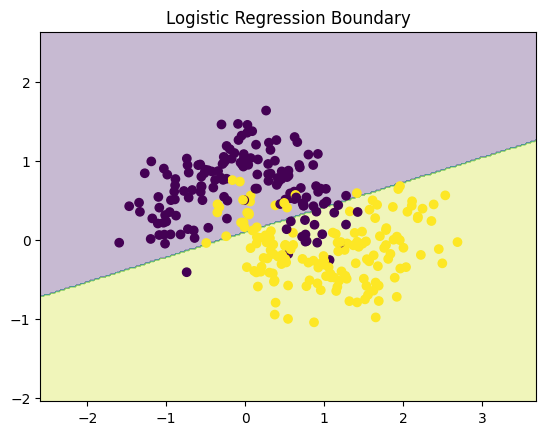

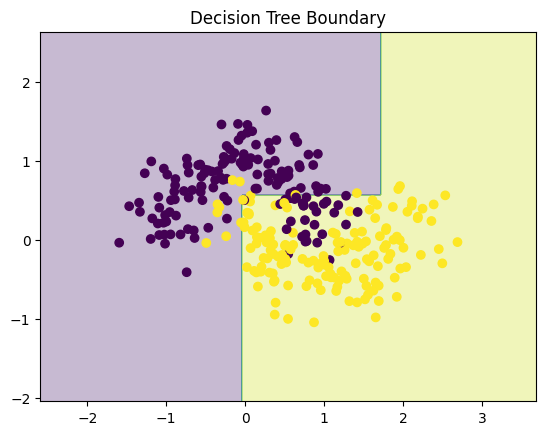

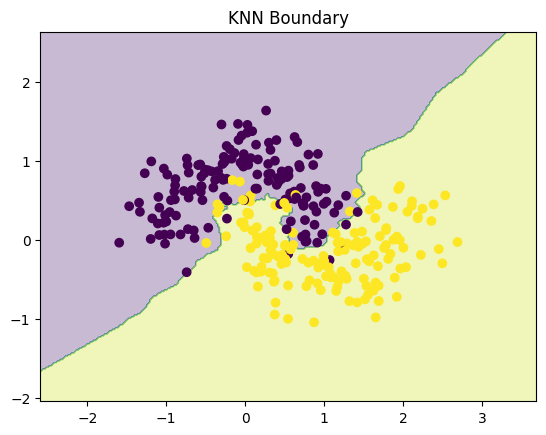

In [127]:
def plot_boundary(model,scaled,title):
  h=0.02
  x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() +1
  y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() +1

  xx,yy = np.meshgrid(np.arange(x_min,x_max,h),
                      np.arange(y_min,y_max,h))
  grid = np.c_[xx.ravel(),yy.ravel()]
  if scaled:
    grid = scaler.transform(grid)
  Z = model.predict(grid)
  Z=Z.reshape(xx.shape)

  plt.contourf(xx,yy,Z,alpha=0.3)
  plt.scatter(X[:,0],X[:,1],c=y)
  plt.title(title)
  plt.show()

plot_boundary(lr,True,"Logistic Regression Boundary")
plot_boundary(dt,True,"Decision Tree Boundary")
plot_boundary(knn,True,"KNN Boundary")


### Recitation

#### Dataset

In [128]:
X = np.array([
    [3,520],
    [4,550],
    [5,580],
    [7,690],
    [8,720],
    [9,750]
])

y = np.array([0,0,0,1,1,1])


#### Test Case

In [129]:
xtest = np.array([[6,650]])

#### Logistic Regression

In [135]:
lr = LogisticRegression()
lr.fit(X,y)
print("Logistic Regression Prediction: Class", lr.predict(xtest))

Logistic Regression Prediction: Class [1]


#### Decision Tree (Entropy)


In [136]:
dt_entropy = DecisionTreeClassifier(criterion='entropy')
dt_entropy.fit(X,y)
print("Decision Tree (Entropy) Prediction: Class", dt_entropy.predict(xtest))

Decision Tree (Entropy) Prediction: Class [0]


#### Decision Tree (Gini)

In [137]:
dt_gini = DecisionTreeClassifier(criterion='gini')
dt_gini.fit(X,y)
print("Decision Tree (Gini) Prediction: Class", dt_gini.predict(xtest))

Decision Tree (Gini) Prediction: Class [0]


#### kNN (k=3)

In [138]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X,y)
print("kNN (k=3) Prediction:Class", knn.predict(xtest))

kNN (k=3) Prediction:Class [1]
